**Loading the Data**

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Read train and test data
train=pd.read_csv("/content/drive/MyDrive/analytics_hackthon/train_s3TEQDk.csv")
test=pd.read_csv("/content/drive/MyDrive/analytics_hackthon/test_mSzZ8RL.csv")
sample=pd.read_csv("/content/drive/MyDrive/analytics_hackthon/sample_submission_eyYijxG.csv")

In [ ]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
print("Leads dataset train has {0} columns and {1} rows".format(train.shape[0],train.shape[1]));
print("Leads dataset test has {0} columns and {1} rows".format(test.shape[0],test.shape[1]))

Leads dataset train has 245725 columns and 11 rows
Leads dataset test has 105312 columns and 10 rows


In [ ]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [ ]:
categorical_var = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'Is_Lead']
numerical_var = ['Age', 'Vintage', 'Avg_Account_Balance']
print(categorical_var)
print(numerical_var)

['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'Is_Lead']
['Age', 'Vintage', 'Avg_Account_Balance']


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


**2. Cleaning Data**

In [ ]:
# Percentage of null values in train dataset
train.isnull().sum()/len(train)*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [ ]:
# Percentage of null values in Test dataset
test.isnull().sum()/len(test)*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

Train and Test dataset has almost 12% missing values in Credit_Product.


Let us replace null values as Unknown.

In [ ]:
train['Credit_Product'].replace(np.nan, 'Unknown', inplace=True)
test['Credit_Product'].replace(np.nan, 'Unknown', inplace=True)

In [ ]:
# Re-checking for null values
train.isnull().sum()/len(train)*100

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

In [ ]:
# Rechecking for null values
test.isnull().sum()/len(test)*100

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
dtype: float64

**3. Exploratory data analysis¶**


Univariate Analysis (numerical)

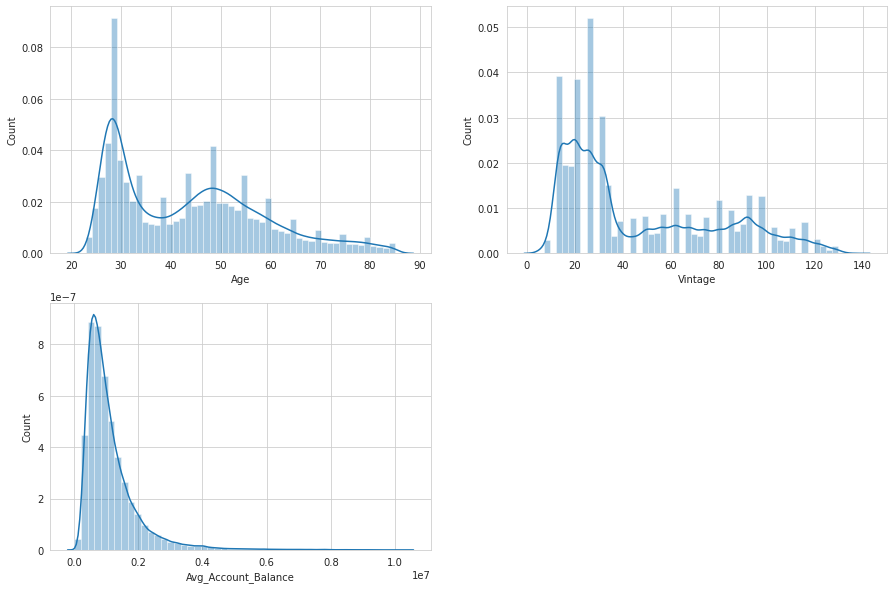

In [ ]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
for k,v in enumerate(numerical_var):
    plt.subplot(2,2,k+1)
    plt.ylabel("Count")
    sns.distplot(train[v])
plt.show()

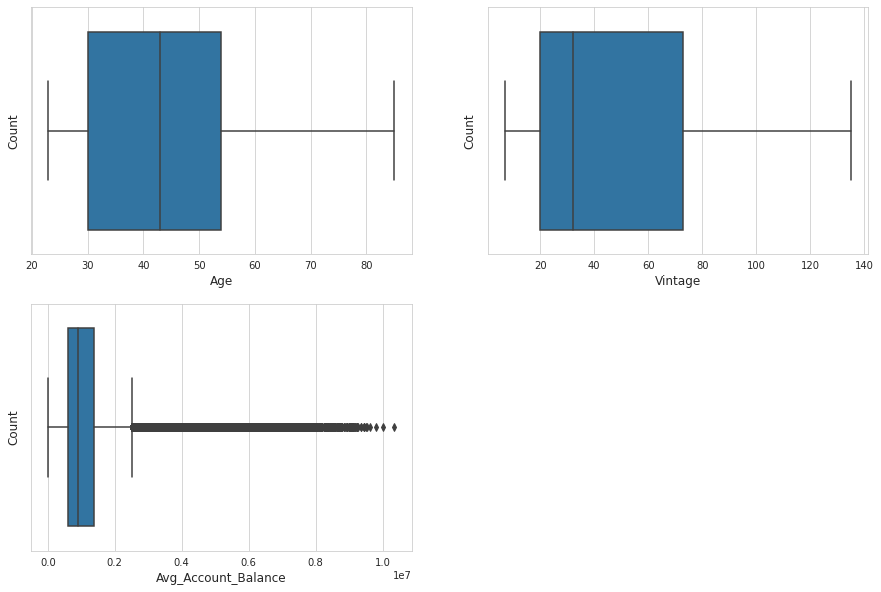

In [ ]:
# Boxplot 
plt.figure(figsize=(15,10))

for i,col in enumerate(numerical_var):
    plt.subplot(2,2,i+1);
    sns.boxplot(train[col])
    plt.xlabel(col,fontdict={'fontsize':12})
    plt.ylabel("Count",fontdict={'fontsize':12})

INFERENCE:
From both box plot and distplot, we can observe that Avg_Account_Balance is right skewed.

Univariate Analysis (Categorical)

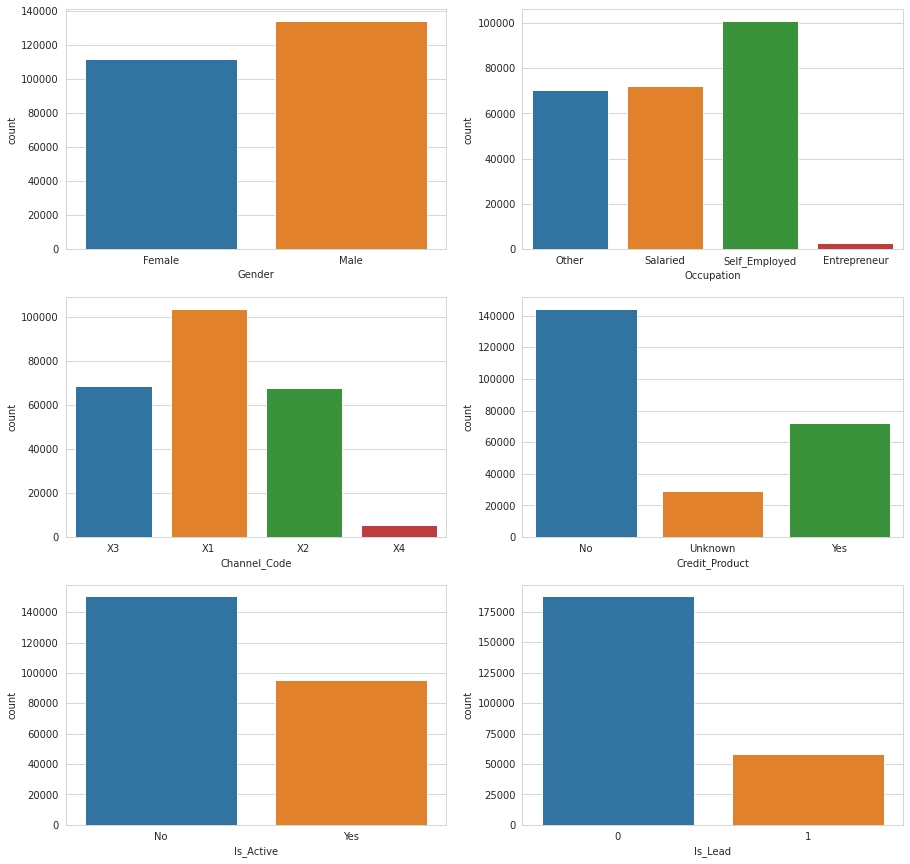

In [ ]:
plt.figure(figsize=(15, 15))
variables = ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'Is_Lead']
for k,v in enumerate(variables):
    plt.subplot(3,2,k+1)
    sns.countplot(v,data=train)
    plt.xlabel(v)
    plt.xticks(rotation = 0)
plt.show()

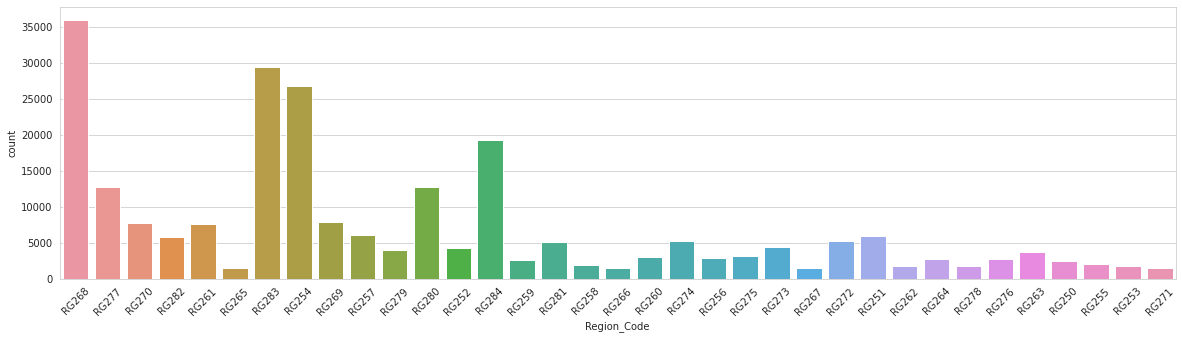

In [ ]:
plt.figure(figsize=(20, 5))

sns.countplot('Region_Code',data=train)
plt.xticks(rotation = 45)
plt.show()


In [ ]:
train['Is_Lead'].value_counts(normalize=True)*100

0    76.279174
1    23.720826
Name: Is_Lead, dtype: float64

In [ ]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

Rate of Conversion is almost 24%

Bivariate Analysis (numerical vs numerical)

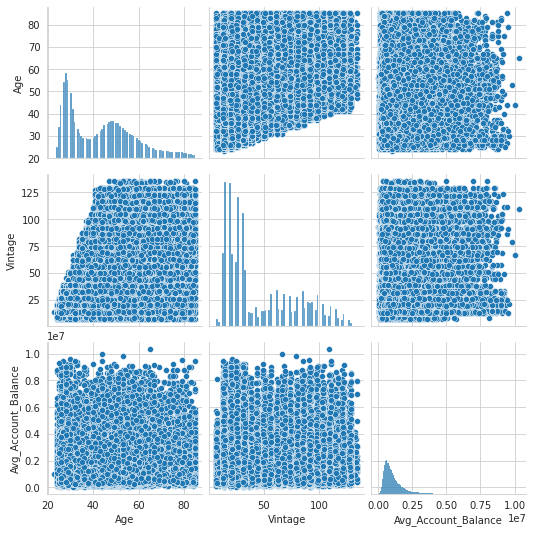

In [ ]:
# Pair plot for Numeric Variables

sns.pairplot(train[numerical_var])
plt.show()

In vintage vs Age scatter plot we can observe that all the data points are below a line. There are no data points above that line. May be there is Max vintage within an age group (23-40). .

Bivariate Analysis (categorical vs numerical)

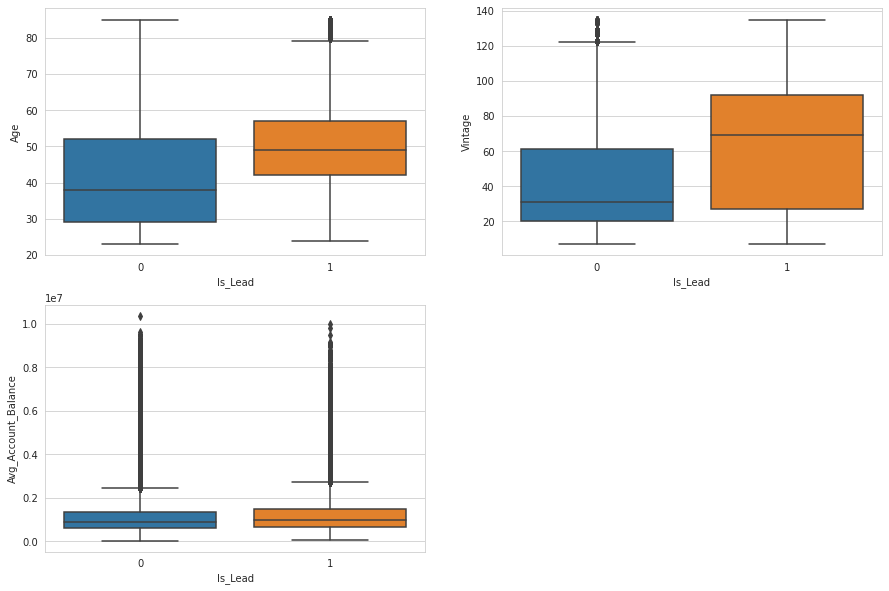

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(y = 'Age', x = 'Is_Lead', data = train)

plt.subplot(2,2,2)
sns.boxplot(y = 'Vintage', x = 'Is_Lead', data = train)

plt.subplot(2,2,3)
sns.boxplot(y = 'Avg_Account_Balance', x = 'Is_Lead', data = train)
plt.show()

INFERENCE:
Median and spread of Avg_Account_Balance in lead and not lead is almost same.
Median Age of customers who are leads is more than that of not lead customers.
Median Vintage of customers who are leads is more than that of not lead customers. The spread is also more in case of customers who are leads

Bivariate Analysis (categorical vs categorical)

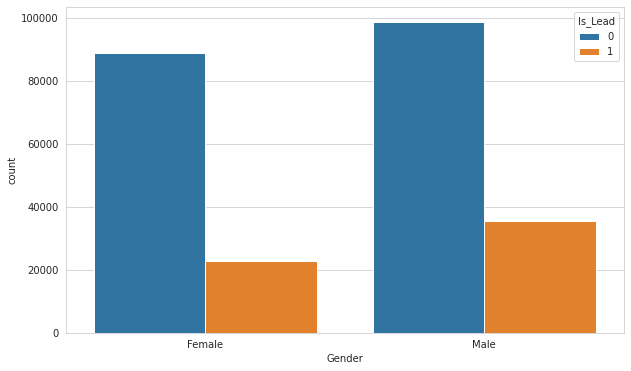

In [ ]:
# Gender vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Gender', hue='Is_Lead', data=train)
plt.show()

In [ ]:
train[train['Gender']=='Male']['Is_Lead'].value_counts(normalize= True)*100

0    73.484504
1    26.515496
Name: Is_Lead, dtype: float64

In [ ]:
train[train['Gender']=='Female']['Is_Lead'].value_counts(normalize= True)*100

0    79.641884
1    20.358116
Name: Is_Lead, dtype: float64

INFERENCE:
Conversion rate of male (26%) is higher than female (20%)

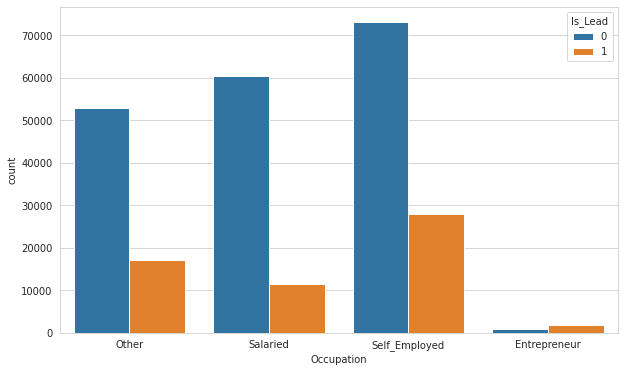

In [ ]:
# Occupation vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Occupation', hue='Is_Lead', data=train)
plt.show()

In [ ]:
train[train['Occupation']=='Entrepreneur']['Is_Lead'].value_counts(normalize= True)*100

1    66.066742
0    33.933258
Name: Is_Lead, dtype: float64

In [ ]:
train[train['Occupation']=='Salaried']['Is_Lead'].value_counts(normalize= True)*100

0    84.033112
1    15.966888
Name: Is_Lead, dtype: float64

INFERENCE:
We can observe that conversion rate among Entrepreneurs is high (66%). Company should focus on getting more Entrepreneurs Leads.
Conversion rate among Salaried customers is low (15%).

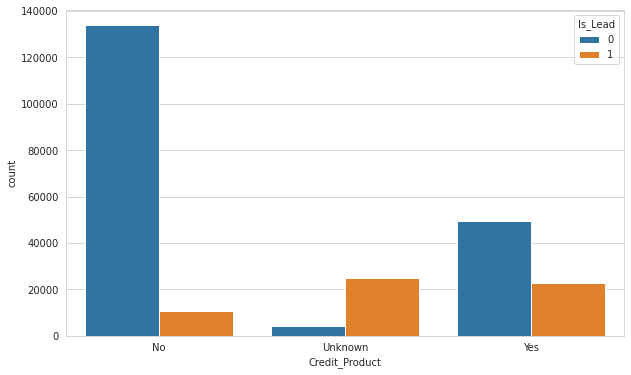

In [ ]:
# Credit_Product vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Credit_Product', hue='Is_Lead', data=train)
plt.show()

In [ ]:
train[train['Credit_Product']=='No']['Is_Lead'].value_counts(normalize= True)*100

0    92.64116
1     7.35884
Name: Is_Lead, dtype: float64

In [ ]:
train[train['Credit_Product']=='Yes']['Is_Lead'].value_counts(normalize= True)*100

0    68.504921
1    31.495079
Name: Is_Lead, dtype: float64

In [ ]:
train[train['Credit_Product']=='Unknown']['Is_Lead'].value_counts(normalize= True)*100

1    85.16624
0    14.83376
Name: Is_Lead, dtype: float64

INFERENCE:
Conversion rate among customers with Credit_Product is more (31%) as compared to customers without Credit_Product (7%)

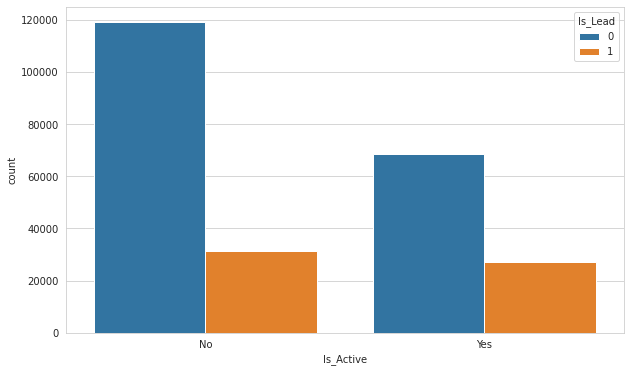

In [ ]:
# Is_Active vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Is_Active', hue='Is_Lead', data=train)
plt.show()

In [ ]:
train[train['Is_Active']=='No']['Is_Lead'].value_counts(normalize= True)*100

0    79.184909
1    20.815091
Name: Is_Lead, dtype: float64

In [ ]:
train[train['Is_Active']=='Yes']['Is_Lead'].value_counts(normalize= True)*100

0    71.703254
1    28.296746
Name: Is_Lead, dtype: float64

INFERENCE:
Conversion rate among customers who were active in last 3 Months is more (28%) as compared to customers who were not active (20%).

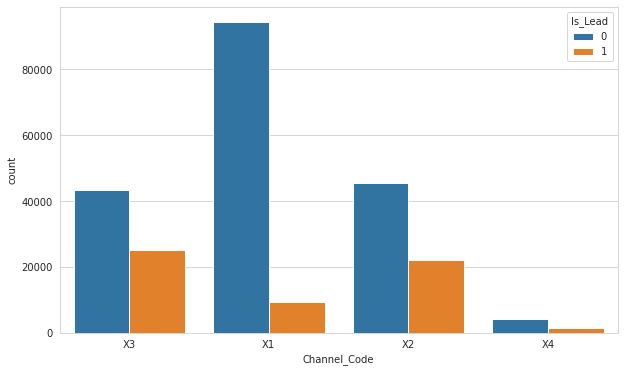

In [ ]:
# Channel_Code vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Channel_Code', hue='Is_Lead', data=train)
plt.show()

In [ ]:
train[train['Channel_Code']=='X1']['Is_Lead'].value_counts(normalize= True)*100

0    90.857903
1     9.142097
Name: Is_Lead, dtype: float64

In [ ]:
train[train['Channel_Code']=='X2']['Is_Lead'].value_counts(normalize= True)*100

0    67.210525
1    32.789475
Name: Is_Lead, dtype: float64

In [ ]:
train[train['Channel_Code']=='X3']['Is_Lead'].value_counts(normalize= True)*100

0    63.297532
1    36.702468
Name: Is_Lead, dtype: float64

In [ ]:
train[train['Channel_Code']=='X4']['Is_Lead'].value_counts(normalize= True)*100

0    75.219968
1    24.780032
Name: Is_Lead, dtype: float64

INFERENCE:
We can observe that conversion rate in Channel_Code X1 is very low (9%) and good in X3 (36%). Company should get more customers from Channel_Code X3 and focus on improving leads from Channel_Code X1.

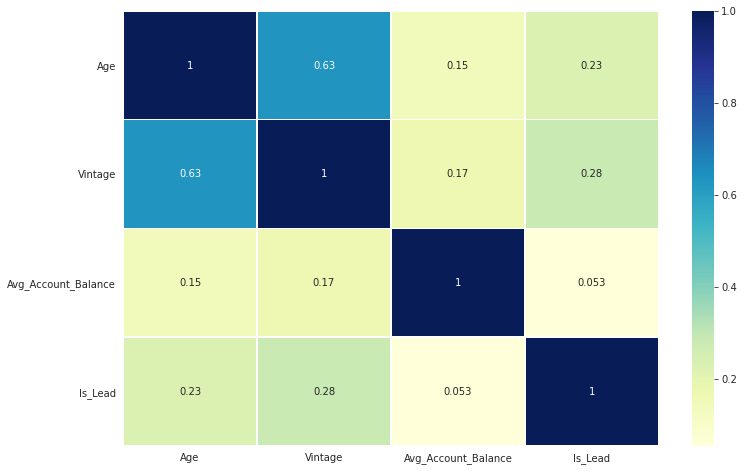

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot = True,linewidths=.5, cmap="YlGnBu")
plt.show()

There is positive correlation between Age and Vintage (63%).

Final INFERENCES from EDA:
Conversion rate of male (26%) is higher than female (20%).
We can observe that conversion rate among Entrepreneurs is high (66%). Company should focus on getting more Entrepreneurs Leads.
Conversion rate among Salaried customers is low (15%).Company should focus on improving leads with Salaried customers.
Conversion rate among customers with Credit_Product is more (31%) as compared to customers without Credit_Product (20%).
Conversion rate among customers who were active in last 3 Months is more (28%) as compared to customers who were not active (20%).
We can observe that conversion rate in Channel_Code X1 is very low (9%) and good in Channel_Code X3 (36%). Company should get more customers from Channel_Code X3 and focus on improving leads from Channel_Code X1.


**5. Data Preparation**


     1.Binary Variable conversion
     2.Categorical Variables conversion
     3.Dropping repeated variable
     4.Performing test-train split
     5.Feaure Scaling

In [ ]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


**Binary Variable conversion**

There are some columns like Credit_Product and Is_Active have Yes, No values, 
so we will convert them to 1,0 respectively.

In [ ]:
binaryList = ['Is_Active']

# Defining the map function
def binaryMapping(x):
    return x.map({'Yes': 1, "No": 0})

# Train data
train[binaryList] = train[binaryList].apply(binaryMapping)

# Test data
test[binaryList] = test[binaryList].apply(binaryMapping)

In [ ]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,0,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,0,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,1,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,0,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,0,0


In [ ]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,0
1,CCMEWNKY,Male,43,RG268,Other,X2,49,Unknown,925537,0
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,0
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,0
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,0


**Dummy Variables**

We will create dummy variables for categorical variables with more than 2 levels.



In [ ]:
variables = ['Gender','Region_Code', 'Occupation', 'Channel_Code','Credit_Product']
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyList_train = pd.get_dummies(train[variables], drop_first=True)
dummyList_test = pd.get_dummies(test[variables], drop_first=True)

In [ ]:
# Adding the results to leads_data
train = pd.concat([train, dummyList_train], axis=1)
test = pd.concat([test, dummyList_test], axis=1)

In [ ]:
# Dropping repeated variable
train.drop(variables,axis=1,inplace=True)
test.drop(variables,axis=1,inplace=True)

In [ ]:
train.shape

(245725, 49)

In [ ]:
test.shape

(105312, 48)

In [ ]:
train.columns

Index(['ID', 'Age', 'Vintage', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead',
       'Gender_Male', 'Region_Code_RG251', 'Region_Code_RG252',
       'Region_Code_RG253', 'Region_Code_RG254', 'Region_Code_RG255',
       'Region_Code_RG256', 'Region_Code_RG257', 'Region_Code_RG258',
       'Region_Code_RG259', 'Region_Code_RG260', 'Region_Code_RG261',
       'Region_Code_RG262', 'Region_Code_RG263', 'Region_Code_RG264',
       'Region_Code_RG265', 'Region_Code_RG266', 'Region_Code_RG267',
       'Region_Code_RG268', 'Region_Code_RG269', 'Region_Code_RG270',
       'Region_Code_RG271', 'Region_Code_RG272', 'Region_Code_RG273',
       'Region_Code_RG274', 'Region_Code_RG275', 'Region_Code_RG276',
       'Region_Code_RG277', 'Region_Code_RG278', 'Region_Code_RG279',
       'Region_Code_RG280', 'Region_Code_RG281', 'Region_Code_RG282',
       'Region_Code_RG283', 'Region_Code_RG284', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_Code_X2',
       'Chan

In [ ]:
train = train.set_index('ID')

In [ ]:
test = test.set_index('ID')

**Performing test-train split**

In [ ]:
# Creating independant Variable
X = train.drop(['Is_Lead'], axis=1)
X.head()

,Age,Vintage,Avg_Account_Balance,Is_Active,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NNVBBKZB,73,43,1045696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
IDD62UNG,30,32,581988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
HD3DSEMC,56,26,1484315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
BF3NC7KV,34,19,470454,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
TEASRWXV,30,33,886787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Creating dependant Variable
y = train['Is_Lead']
y.head()

ID
NNVBBKZB    0
IDD62UNG    0
HD3DSEMC    0
BF3NC7KV    0
TEASRWXV    0
Name: Is_Lead, dtype: int64

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
#Seleting chi-square test for feature engineering
bestfeature=SelectKBest(score_func=chi2,k=10)
fit=bestfeature.fit(X,y)
df_p_score=pd.DataFrame(fit.pvalues_)
df_columns=pd.DataFrame(X.columns)
feature_score=pd.concat([df_columns,df_p_score],axis=1)
feature_score.columns=['features','P_score']

In [ ]:
# Printing the score
feature_score.sort_values(by=['P_score'],ascending=True)

,features,P_score
0,Age,0.000000e+00
43,Channel_Code_X3,0.000000e+00
42,Channel_Code_X2,0.000000e+00
40,Occupation_Salaried,0.000000e+00
45,Credit_Product_Unknown,0.000000e+00
46,Credit_Product_Yes,0.000000e+00
1,Vintage,0.000000e+00
2,Avg_Account_Balance,0.000000e+00
3,Is_Active,3.641198e-242
41,Occupation_Self_Employed,3.780863e-184


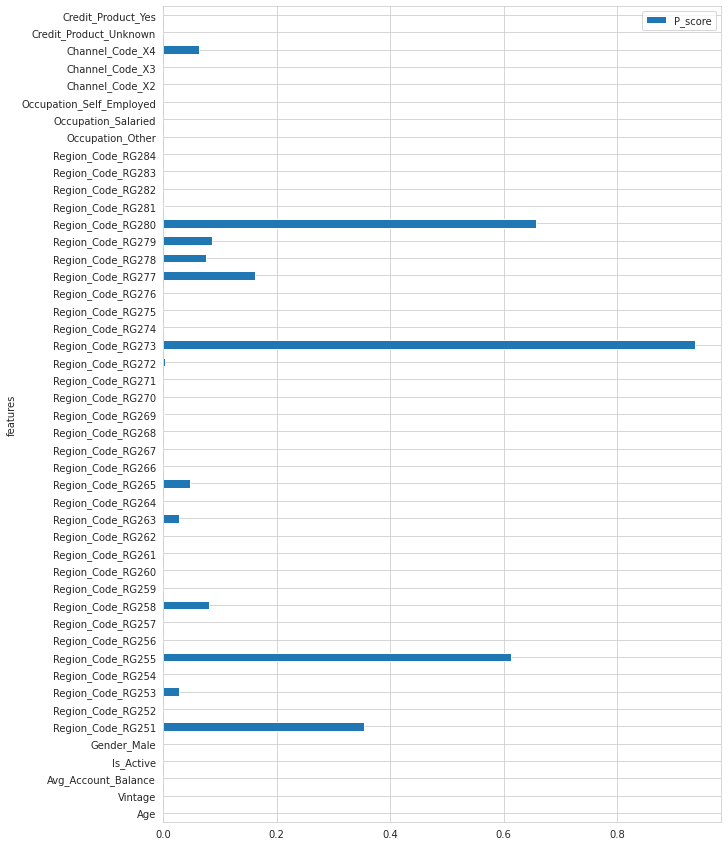

In [ ]:
feature_score.plot.barh(x='features',y='P_score',figsize=(10,15))

In [ ]:
# Taking cutoff level for features is 0.08539033
new_features=feature_score[feature_score.P_score<0.08539033]

# Taking features for model build
X1=X[new_features.features]

# before and after features engineering task no.of features
print("******** After Feature engineering no.of features for model******** \n ",len(new_features.features),"\n \n******** Before feature engineering no.of features for model******** \n \n  ",len(X.columns))

******** After Feature engineering no.of features for model******** 
  41 
 
******** Before feature engineering no.of features for model******** 
 
   47


In [ ]:
# Splitting the data into train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X1, y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
X_train.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Active', 'Gender_Male',
       'Region_Code_RG252', 'Region_Code_RG253', 'Region_Code_RG254',
       'Region_Code_RG256', 'Region_Code_RG257', 'Region_Code_RG258',
       'Region_Code_RG259', 'Region_Code_RG260', 'Region_Code_RG261',
       'Region_Code_RG262', 'Region_Code_RG263', 'Region_Code_RG264',
       'Region_Code_RG265', 'Region_Code_RG266', 'Region_Code_RG267',
       'Region_Code_RG268', 'Region_Code_RG269', 'Region_Code_RG270',
       'Region_Code_RG271', 'Region_Code_RG272', 'Region_Code_RG274',
       'Region_Code_RG275', 'Region_Code_RG276', 'Region_Code_RG278',
       'Region_Code_RG281', 'Region_Code_RG282', 'Region_Code_RG283',
       'Region_Code_RG284', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Credit_Product_Unknown', 'Credit_Product_Yes'],
      dtype='object')

In [ ]:
X_train.shape

(196580, 41)

**Feaure Scaling**

In [ ]:
# Scaling Data
scaler = MinMaxScaler()
numerical_var 

['Age', 'Vintage', 'Avg_Account_Balance']

In [ ]:
# there are 3 variables ('Age', 'Vintage', 'Avg_Account_Balance') which are continuous so we will scale them
X_train[numerical_var] = scaler.fit_transform(X_train[numerical_var])

In [ ]:
X_train.head()

,Age,Vintage,Avg_Account_Balance,Is_Active,Gender_Male,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG278,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PQ2DEHSP,0.903226,0.421875,0.034371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
GSJVXZ7I,0.564516,0.570312,0.102609,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
FSTYAUFT,0.483871,0.062500,0.023627,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
JSU8ARPY,0.661290,0.437500,0.115266,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
FNHBWMGK,0.370968,0.054688,0.117673,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
# Transform Validation Data Set
X_valid[numerical_var] = scaler.transform(X_valid[numerical_var])
# Transform Test Data Set
test[numerical_var] = scaler.transform(test[numerical_var])

**6. Model Building**

Model 1: using all the variables


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
 train_preds = logistic_model.predict(X_train)
test_preds = logistic_model.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import roc_auc_score
ytrain_pred = logistic_model.predict_proba(X_train)
print('logistic_model train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = logistic_model.predict_proba(X_valid)
print('logistic_model test roc-auc: {}'.format(roc_auc_score(y_valid, ytest_pred[:,1])))

logistic_model train roc-auc: 0.8587539414475974
logistic_model test roc-auc: 0.8571415867696628


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91    149793
           1       0.82      0.49      0.61     46787

    accuracy                           0.85    196580
   macro avg       0.84      0.73      0.76    196580
weighted avg       0.85      0.85      0.84    196580



In [ ]:
# #Confusion matrix on test data
from sklearn.metrics import confusion_matrix
# Get the accuracy score of logreg model and print it
print(" Train Accuracy of logistic regression classifier: ",logistic_model.score(X_train,y_train))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,train_preds)

 Train Accuracy of logistic regression classifier:  0.8529962356292603


array([[144868,   4925],
       [ 23973,  22814]])

In [ ]:
#Features selection for predictions
filter_final_cols=X1.columns
print("*********** No.of feature selected for preditions ************\n",len(filter_final_cols))

*********** No.of feature selected for preditions ************
 41


In [ ]:
test = test.drop(['Region_Code_RG251','Region_Code_RG255','Region_Code_RG273','Region_Code_RG277','Region_Code_RG279','Region_Code_RG280'], axis='columns')

In [ ]:
 # probability prediction
train_preds = logistic_model.predict(test)
pred_lst=train_preds.tolist()

# Exporting sample output

sample.loc[:,'Is_Lead']=pred_lst

#Final Submission file
sample.to_csv('submission.csv',index=False)

In [ ]:
data=pd.read_csv("/content/submission.csv")

In [ ]:
data.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
